In [47]:
import numpy as np
from keras.models import model_from_json
import requests
from io import BytesIO
import PIL.Image as Image
import matplotlib.pyplot as plt

In [48]:
j_file = open('modelnew.json', 'r')
loaded_json_model = j_file.read()
j_file.close()
model = model_from_json(loaded_json_model)
model.load_weights('modelnew.h5')

(1, 224, 224, 3)
1/1 [==============================] - 1s 919ms/step
You have symptoms of Melanocytic Nevi.
Accuracy in this prediction was 84%
0%	 Actinic Keratoses (Solar Keratoses) or intraepithelial Carcinoma (Bowen’s disease)
0%	 Basal Cell Carcinoma
14%	 Benign Keratosis
0%	 Dermatofibroma
1%	 Melanoma
84%	 Melanocytic Nevi
0%	 Vascular skin lesion


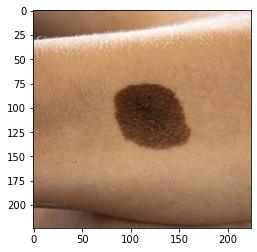

In [54]:
SKIN_CLASSES = {
  0: 'Actinic Keratoses (Solar Keratoses) or intraepithelial Carcinoma (Bowen’s disease)',
  1: 'Basal Cell Carcinoma',
  2: 'Benign Keratosis',
  3: 'Dermatofibroma',
  4: 'Melanoma',
  5: 'Melanocytic Nevi',
  6: 'Vascular skin lesion'
}
def predict(url):
    j_file = open('modelnew.json', 'r')
    loaded_json_model = j_file.read()
    j_file.close()
    model = model_from_json(loaded_json_model)
    model.load_weights('modelnew.h5')

    response = requests.get(url)
    img1 = Image.open(BytesIO(response.content))
    def crop_center(pil_img, crop_width, crop_height):
      img_width, img_height = pil_img.size
      return pil_img.crop(((img_width - crop_width) // 2,(img_height - crop_height) // 2,(img_width + crop_width) // 2,(img_height + crop_height) // 2))

    size = min(img1.size[0],img1.size[1])
    img1 = crop_center(img1,size,size)
    img1 = img1.resize((224,224),Image.ANTIALIAS)
    img1 = np.array(img1)
    img1 = img1.reshape((1,224,224,3))
    print(img1.shape)
    plt.imshow(img1[0])
    img1 = img1 / 255.
    prediction = model.predict(img1)
    pred = np.argmax(prediction)
    disease = SKIN_CLASSES[pred]
    accuracy = prediction[0][pred]
    print(f"You have symptoms of {disease}.")
    print(f"Accuracy in this prediction was {int(accuracy*100)}%")
    for i in range(len(prediction[0])):
        print(int(prediction[0][i]*100),"\b%\t",SKIN_CLASSES[i])

predict("https://www.olivaclinic.com/wp-content/uploads/2018/08/02-Blog_MelanocyticNevus_Aug2018.jpg")

In [45]:
for i in range(len(prediction[0])):
    print(int(prediction[0][i]*100),"\b%\t",SKIN_CLASSES[i])

0%	 Actinic Keratoses (Solar Keratoses) or intraepithelial Carcinoma (Bowen’s disease)
8%	 Basal Cell Carcinoma
2%	 Benign Keratosis
8%	 Dermatofibroma
0%	 Melanoma
80%	 Melanocytic Nevi
0%	 Vascular skin lesion
